# VISUALIZING FEATURES with TSNE, Isomap, PCA, UMAP

In [1]:
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA
from umap import UMAP
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Create Function

In [2]:
def compare_viz(data, labels, title, dct_pca, dct_tsne, dct_isomap, dct_umap, dct_plot):

    x_pca =  np.expand_dims(PCA(**dct_pca).fit_transform(data), axis=0)
    x_tsne = np.expand_dims(TSNE(**dct_tsne).fit_transform(data), axis=0)
    x_iso =  np.expand_dims(Isomap(**dct_isomap).fit_transform(data), axis=0)
    x_umap = np.expand_dims(UMAP(**dct_umap).fit_transform(data), axis=0)

    transformed_data = np.concatenate((x_pca, x_tsne, x_iso, x_umap), axis=0)

    method_name = ['PCA', 'TSNE', 'Isomap', 'UMAP']
    
    fig, axes = plt.subplots(2,2, figsize=(16,10))
    fig.suptitle('Visualisation in 2-Dimensional Space', fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.scatter(transformed_data[i,:,0], transformed_data[i,:,1], c=labels, **dct_plot)
        ax.set_title(method_name[i])
    plt.show()

## Set Parameters

In [3]:
pca_param = {'n_components':2}
plot_para ={'alpha':0.7, 'cmap':'viridis', 'edgecolors':'grey', 's':20}

In [4]:
plt.style.use('seaborn')

## Load Dataset

In [5]:
iris = load_iris()
digits = load_digits()
wine = load_wine()
breast = load_breast_cancer()

#mnist_x, mnist_y = fetch_openml('mnist_784', version=1, return_X_y=True)
#fmnist_x, fmnist_y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)

### IRIS

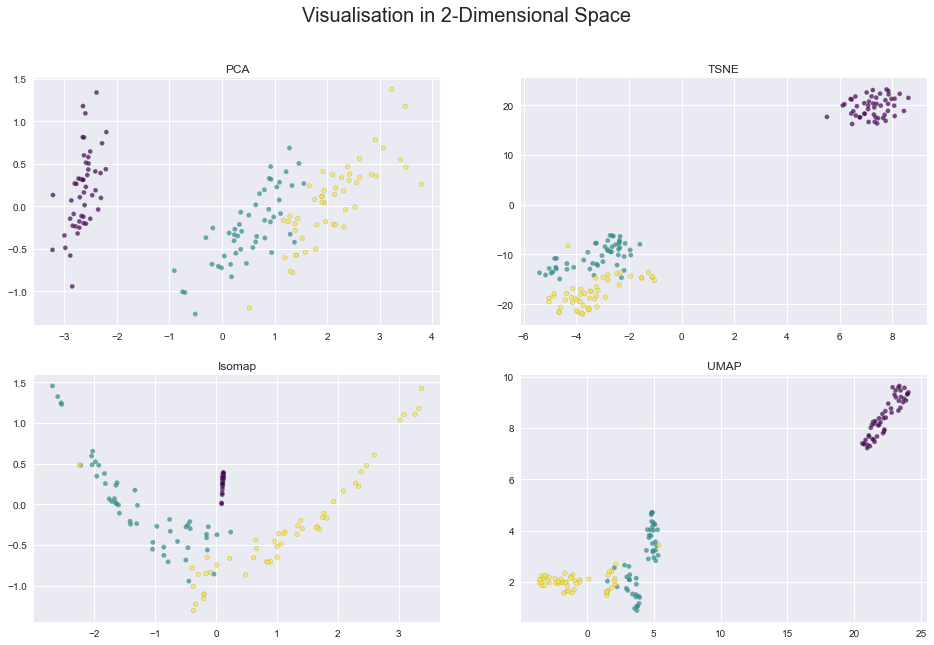

In [6]:
compare_viz(iris.data, iris.target, 'IRIS', pca_param, pca_param, pca_param, pca_param, plot_para)

### DIGITS

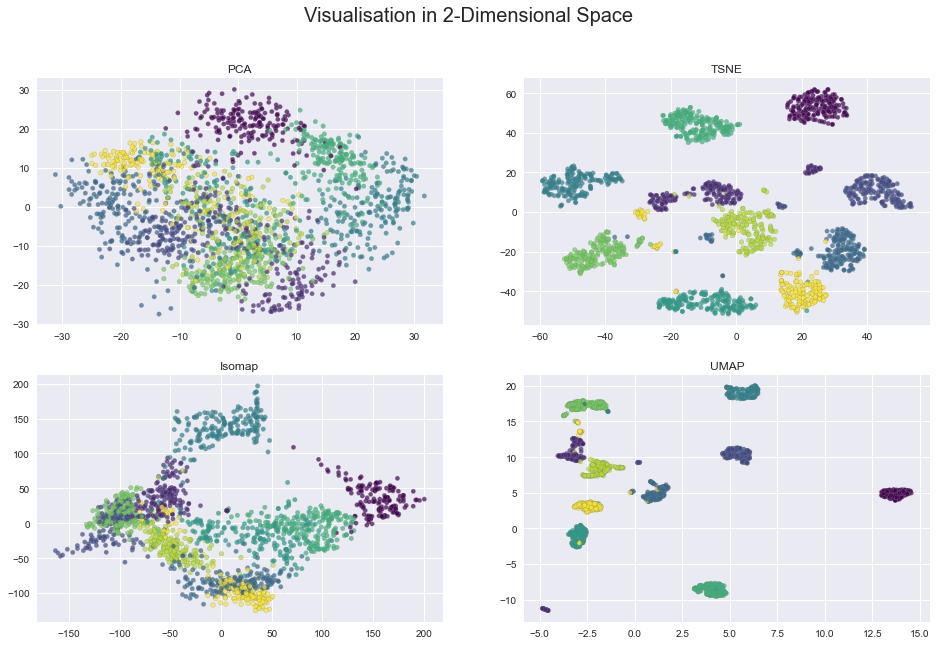

In [7]:
compare_viz(digits.data, digits.target, 'DIGITS', pca_param, pca_param, pca_param, pca_param, plot_para)

### WINE

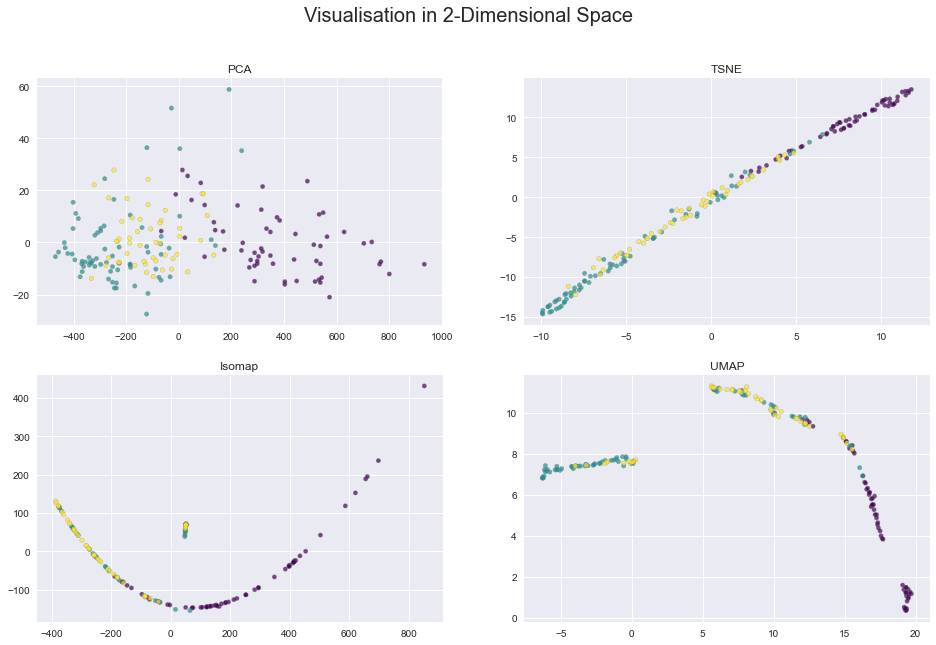

In [8]:
compare_viz(wine.data, wine.target, 'WINE', pca_param, pca_param, pca_param, pca_param, plot_para)

### BREAST

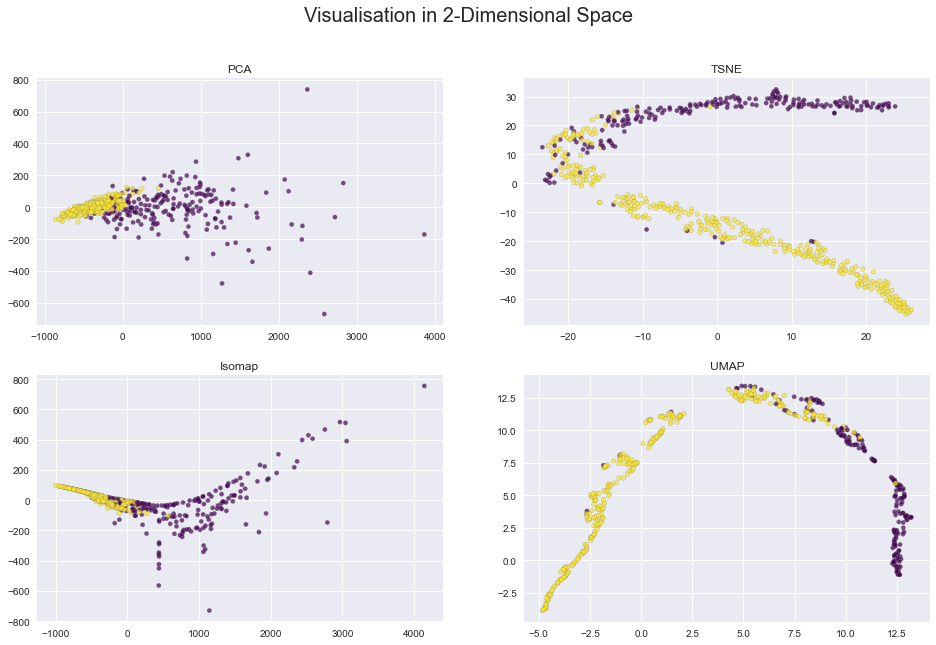

In [9]:
compare_viz(breast.data, breast.target, 'BREAST', pca_param, pca_param, pca_param, pca_param, plot_para)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)

check whether umap produce consistent result for visualizing same class data

In [11]:
import matplotlib as mpl

In [12]:
train_umap = UMAP(n_components=2, random_state=42).fit_transform(X_train)
test_umap =  UMAP(n_components=2, random_state=42).fit_transform(X_test)

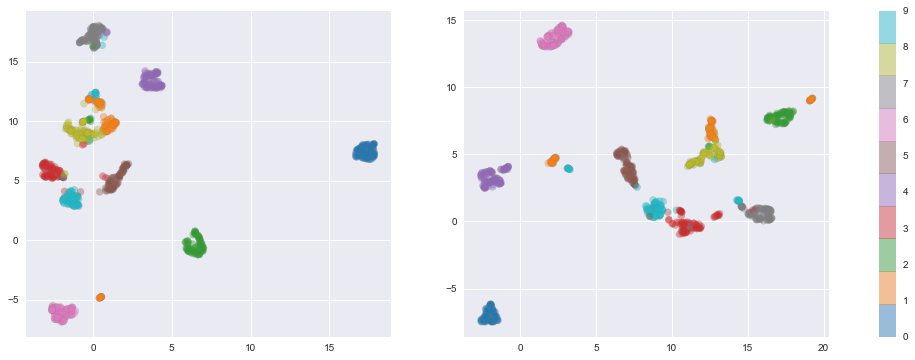

In [13]:
fig, axes = plt.subplots(1,2, figsize=(18,6))
im = axes[0].scatter(train_umap[:,0],train_umap[:,1], c=y_train, cmap='tab10', alpha=.4, edgecolor='grey')
im = axes[1].scatter(test_umap[:,0],test_umap[:,1], c=y_test, cmap='tab10', alpha=.4, edgecolor='grey')

cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
plt.colorbar(im, cax=cax, ticks=np.unique(y_train).astype(int))

plt.show()

### MNIST

In [14]:
#compare_viz(mnist_x, mnist_y, 'MNIST', pca_param, pca_param, pca_param, plot_para)

### FASHION-MNIST

In [15]:
#compare_viz(fmnist_x, fmnist_y, 'FASHION-MNIST', pca_param, pca_param, pca_param, plot_para)